In [1]:
#Like SVMs, Decision Trees are versatile ML algorithms which can perform both regression and classification, as well as 
#multioutput tasks. They are powerful and capable of fitting complex datasets (e.g. overfitted housing dataset in chpt 2).
#Here we have a classification example with the iris dataset using DecisionTreeClassifier:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length, petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
#To visualize the trained Decision Tree, use export_graphvix() to output a graph definition file called iris_tree.dot
from sklearn.tree import export_graphviz
import os

def image_path(file):
    path = os.path.join(os.getcwd(), file)
    return path

export_graphviz(tree_clf, out_file=image_path('iris_tree.dot'),
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

#The dot command-line tool from the Graphviz package can then convert the .dot file to a pdf or png, via:
# dot -Tpng iris_tree.dot -o iris_tree.png

![DT](iris_tree.png)

In [5]:
#To see how the tree makes predictions: to classify an unknown iris, start at the root node (depth 0), it asks if the 
#petal length <= 2.45cm. If true, move to the root's left child node (depth 1, left). In this case, it is a leaf node since
#it does not itself have any child nodes, so does not ask any questions. Simply look at the class for that node - the 
#Decision Tree predicts that class=setosa.
#If another flower has petal length > 2.45cm, move to the root's right child node (depth 1, right), which is not a leaf 
#node, so it asks another question - if the petal width <= 1.75cm. If it is, class=versicolor (depth 2, left), else then
#class=viginica (depth 2, right).

#Each node's samples attribute counts how many training instances it applies to. The value attribute gives the number
#of training instances of each class that this node applies to - the depth-2 right node applies to 0 setosa, 1 versicolor
#and 45 virginica. The gini attribute measures its impurity - a node is pure (gini=0) if all training instances it applies
#to belong to the same class. The gini score of the ith node is G_i = 1 - Σ(p_i_k)^2 where p_i_k is the ratio of class k
#instances among the training instances of the ith node. The depth-2 left node has G = 1-(0/54)^2 - (49/54)^2 - (5/54)^2.

#Since max_depth=2 above, the Decision Tree stops at two decision boundaries in parameter space - adding greater depth
#will further fragment the impure area (the pure area, containing only iris setosa, cannot be split any further).

#N.B. Decision Trees are intuitive, and their decisions are easy to interpret. Such models are often called white box 
#models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models. They 
#make great predictions, and you can easily check the calculations that they performed to make these predictions; 
#nevertheless, it is usually hard to explain in simple terms why the predictions were made. For example, if a neural 
#network says that a particular person appears on a picture, it is hard to know what contributed to this prediction: did 
#the model recognize that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they were sitting 
#on? Conversely, Decision Trees provide nice, simple classification rules that can even be applied manually if need be 
#(e.g., for flower classification).
#Another quality of Decision Trees is that they require very little data preparation (no feature scaling or centering)

In [8]:
#Decision Trees can also estimate the probability that an instance belongs to a particular class k - it traverses the
#tree to find the leaf node for the instance, then returns the ratio of training instance of class k in this node. For 
#example, with a flower 5cm and 1.5cm wide, it corresponds to the depth-2 left node, so the Decision Tree will output
#the following probabilities: 0% (0/54) for setosa, 90.7% (49/54) for versicolor and 9.3% (5/54) for virginica. If asked
#to predict a class, it will output class 1 (Iris versicolor) as it has the highest probability.

tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

In [9]:
#Scikit-Learn uses the CART algorithm, producing only binary trees (nonleaf nodes always have two children, so questions
#only with yes/no answers). Other algorithms, such as ID3, can produce DTs with nodes that have more than two children.
#CART stands for Classification and Regression Tree. It splits the training set into two subsets using a single feature k
#and a threshold t_k (e.g. petal length <= 2.45cm). It chooses k and t_k by searching for the pair (k, t_k) that produces
#the purest subsets (weighted by their size). For left and right subsets, CART minimises the cost function:
# J(k, t_k) = (m_left/m)*G_left + (m_right/m)*G_right. After splitting the training set into two, it splits the subsets
#using the same logic, then the sub-subsets etc. recursively, stopping at the set maximum depth (via the max_depth 
#hyperparameter), or if it cannot find a split that will reduce impurity. Additional stopping conditions are controlled by
#the hyperparameters min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_left_nodes.

#Note that CART is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats at each
#subsequent level - it does not check whether or not the split will lead to the lowest possible impurity several levels
#down the tree. Greedy algorithms tend to produce solutions that are reasonably good but not guaranteed to be optimal.
#Finding an optimal tree is NP-complete: it requires O(exp(m)) time, therefore intractable even more small training sets - 
#hence we settle for 'reasonably good'.
#With respect to the computational complexity of predictions, making one required traversing the Decision Tree from the 
#root to a leaf. In general Decision Trees are approximately balanced, so traversing a tree requires traversing around
#O(log_2(m)) nodes. As each node requires checking the value of one feature, total prediction complexity is O(log_2(m)),
#independant of n - hence prediction is fast even with large training sets. 
#The training algorithm compares all n features (or less if max_features is set) on all samples at each node, resulting in
#complexity O(n * mlog_2(m)). For small (1000s) datasets, sklearn can speed up training by presorting the data (set 
#presort=True), but doing so for larger datasets slows training considerably.

#By default, the Gini impurity measure is used, but the entropy impurity measure may be selected instead by setting the
#hyperparameter criterion='entropy'. In thermodynamics, entropy tends to zero when the molecules are still and well
#ordered, while in Shannon's information theory it measures the average information content of a message (a reduction of
#entropy is often termed an information gain) - entropy is zero when all messages are identical. In ML entropy is often
#used as an inpurity measure - a set has zero entropy when it contains instances of only one class. It is found by:
# H_i = − Σ p_i_k*log_2(p_i_k), where we sum from k=1 to n and p_i_k != 0. The above depth-2 left node has H = 0.445.
#Most of the time, choosing Gini impurity or entropy makes little difference (they lead to similar trees). Gini impurity
#is faster, so is a good default. When they do differ, Gini tends to isolate the most frequent class in its own branch 
#while entropy produces slightly more balanced trees.

In [10]:
#Decision Trees make very few assumptions about the training data (as opposed to linear models, which assume that the data 
#is linear, for example). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very
#closely—indeed, most likely overfitting it. Such a model is often called a nonparametric model, not because it does not 
#have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the
#model structure is free to stick closely to the data. In contrast, a parametric model, such as a linear model, has a 
#predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing
#the risk of underfitting).

#To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training regularization. 
#The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the max_depth
#hyperparameter (the default value is None, which means unlimited). The DecisionTreeClassifier class has a few other 
#parameters that similarly restrict the shape of the Decision Tree: (1) min_samples_split (the minimum number of samples a 
#node must have before it can be split), (2) min_samples_leaf (the minimum number of samples a leaf node must have), 
#(3) min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted 
#instances), (4) max_leaf_nodes (the maximum number of leaf nodes), and (5) max_features (the maximum number of features 
#that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will
#regularize the model. For example increasing min_samples_leaf to 4 could reduce overfitting by preventing leaf nodes
#which only cover a small number of training instances correctly.

#Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary nodes.
#A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not 
#statistically significant. Standard statistical tests, such as the χ2 test (chi-squared test), are used to estimate the
#probability that the improvement is purely the result of chance (which is called the null hypothesis). If this probability
#(the p-value), is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is 
#considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.

4 15


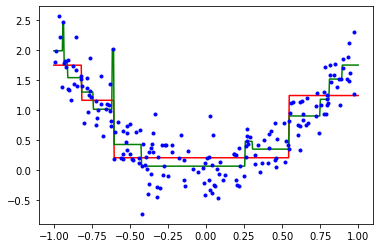

In [72]:
#Decision Trees can also perform regression using the DecisionTreeRegressor class:

from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 200
X = 2*np.random.rand(m, 1) - 1
y = 2*X**2  + np.random.randn(m, 1)/3

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(X, y)

print(tree_reg1.get_n_leaves(), tree_reg2.get_n_leaves())

X_range = np.linspace(-1, 1, 500).reshape(-1 , 1)
y_pred1 = tree_reg1.predict(X_range)
y_pred2 = tree_reg2.predict(X_range)
plt.plot(X_range, y_pred1, 'r-')
plt.plot(X_range, y_pred2, 'g-')
plt.plot(X, y, 'b.')
plt.show()

export_graphviz(tree_reg1, out_file=image_path('reg_tree2.dot'),
               feature_names=['x1'],
               rounded=True,
               filled=True)

#The dot command-line tool from the Graphviz package can then convert the .dot file to a pdf or png, via:
# dot -Tpng reg_tree.dot -o reg_tree.png

![DT_reg](reg_tree2.png)

In [ ]:
#The tree is similar to the one for classification, except that instead of predicting a class in each node, it predicts a
#value. The bottom rightmost node predicts a value of 1.246. This prediction is the average target value of the 46 training
#instances associated with this leaf node, and it results in a mean squared error of 1.246 over these 46 instances.
#Note how the predicted value for each region is always the average target value of the instances in that region - the 
#algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

In [ ]:
#The CART algorithm works similar to as it did with classification, except that instead of trying to split the training
#set in a way that minimizes impurity, it now tries to split in a way that minimizes MSE:
# J(k, t_k) = (m_left/m)*MSE_left + (m_right/m)*MSE_right where MSE_node = Σ (y_hat_node - y^(i))^2, where y_hat is the
#average value of all the instances in the node, and the summation is over all the instances in the node.

#As with classification Decision Trees, those for regression are also prone to overfitting. Regularizing is often required
#using the previously listed min_* and max_* hyperparameters, such as min_samples_leaf.

In [ ]:
#Decision Trees have a lot going for them: they are simple to understand and interpret, easy to use, versatile, and 
#powerful. However, they do have a few limitations. First, as you may have noticed, Decision Trees love orthogonal 
#decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.
#For example, if you have a linearly separable dataset, such that all instances where x1 <= 0 are class 0 and class 1 if 
#x1 > 0, a Decision Tree can split it easily. Meanwhile this dataset rotated 45 degrees makes the decision boundary 
#unnecessaryily convoluted. Although both Decision Trees may fit the training data perfectly, the convoluted model is
#unlikely to generalize well. One way to limit this is with Principal Component Analysis (PCA) which often results in a 
#better orientation of the training data.

#More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training 
#data. For example, if you just remove the widest Iris versicolor from the iris training set (the one with petals 4.8 cm 
#long and 1.8 cm wide) and train a new Decision Tree, you may get a completely different set of (feature, threshold) pairs
#that the Decision Tree decides to use to split up the data. Actually, since the training algorithm used by sklearn is
#stochastic (it randomly selects the set of features to evaluate at each node), you may get very different models even on
#the same training data (unless you set the random_state hyperparameter).
#Random Forests can limit this instability by averaging predictions over many trees - see the next section.